**Multiple linear regression**

Multiple linear regression uses to model more complex relationships between two or more independent variables and one dependent variable. It is used when there are two or more x variables.

In [25]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
#data on boarding
from google.colab import files
df = files.upload()

Saving Real estate.csv to Real estate.csv


In [70]:
#raw data into data frame
df = pd.read_csv('Real estate.csv')


In [71]:
#copy of the data
df_copy = df.copy()

In [72]:
df_copy

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


EDA

In [73]:
df.shape

(414, 6)

In [74]:
df.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [75]:
df.tail()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5
413,6.5,90.45606,9,24.97433,121.54310,63.9


In [76]:
#data slicing
df.iloc[5:15]

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
5,7.1,2175.03000,3,24.96305,121.51254,32.1
6,34.5,623.47310,7,24.97933,121.53642,40.3
7,20.3,287.60250,6,24.98042,121.54228,46.7
8,31.7,5512.03800,1,24.95095,121.48458,18.8
9,17.9,1783.18000,3,24.96731,121.51486,22.1
10,34.8,405.21340,1,24.97349,121.53372,41.4
11,6.3,90.45606,9,24.97433,121.54310,58.1
12,13.0,492.23130,5,24.96515,121.53737,39.3
13,20.4,2469.64500,4,24.96108,121.51046,23.8
14,13.2,1164.83800,4,24.99156,121.53406,34.3


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X2 house age                            414 non-null    float64
 1   X3 distance to the nearest MRT station  414 non-null    float64
 2   X4 number of convenience stores         414 non-null    int64  
 3   X5 latitude                             414 non-null    float64
 4   X6 longitude                            414 non-null    float64
 5   Y house price of unit area              414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


In [78]:
#mini statistical report
df.describe()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [79]:
#data Cleaning
df.isnull().sum()

X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [80]:
#Assingning each column to x and y
x = df.iloc[:, :-1]

In [81]:
y = df.iloc[:, -1]

Train-Test Spilit

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state=7)

In [84]:
y_test

258    63.3
109    28.4
90     45.4
148    45.1
388    27.3
       ... 
321    37.7
237    39.0
86     27.0
37     25.3
2      47.3
Name: Y house price of unit area, Length: 125, dtype: float64

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
std_reg = LinearRegression()#y=mx+c

In [87]:
std_reg.fit(x_train,y_train)

LinearRegression()

**Evalution**

In [89]:
#Predict the results
y_predict = std_reg.predict(x_test)

In [104]:
y_predict

array([50.83607006, 34.45850789, 44.10866289, 12.17344561, 32.65186865,
       45.47728879, 10.43863894, 46.87878663, 47.11920949, 35.45921881,
       42.07222289, 39.97456599, 46.46074544, 45.99562655, 38.950243  ,
       33.26946053, 23.06058229, 42.22202504, 38.1005071 , 34.8415003 ,
       29.43256686, 37.82961315, 55.34357786, 13.86271209, 42.76756943,
       31.95548468, 35.59975515, 46.332722  , 32.3731479 ,  6.6018284 ,
       49.15992916, 45.75637663, 43.11643064, 43.03009607, 48.54562089,
       45.6558589 , 44.47106822, 42.09944965, 42.92339543, 42.16757152,
       46.95893749, 39.07416356, 44.61142099, 45.53174231, 13.04286449,
       33.44627003, 46.27826848, 40.75990271, 51.232337  , 45.58619584,
       37.36857252, 48.16229155, 29.90084942, 32.7694181 , 29.67150479,
       46.27826848, 41.14303903, 13.48347394, 47.23655859, 28.99952569,
       40.78258545, 33.13425146, 38.57721784, 38.02493718, 38.83995099,
       32.03762851, 47.37703413, 37.39865372, 13.58621768, 31.39

In [105]:
#actual value
y_test

258    63.3
109    28.4
90     45.4
148    45.1
388    27.3
       ... 
321    37.7
237    39.0
86     27.0
37     25.3
2      47.3
Name: Y house price of unit area, Length: 125, dtype: float64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


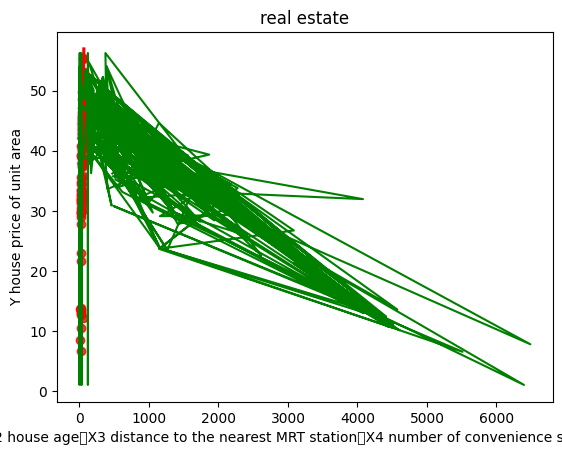

In [106]:
sns.regplot(x=y_test,y=y_predict,ci=None,color="red")
plt.plot(x_train,std_reg.predict(x_train),color = "green")
plt.title("real estate")
plt.xlabel("X1 transaction date	X2 house age	X3 distance to the nearest MRT station	X4 number of convenience stores	X5 latitude	X6 longitud")
plt.ylabel("Y house price of unit area")
plt.show()

In [107]:
y_test #error rate = 4+9+3

258    63.3
109    28.4
90     45.4
148    45.1
388    27.3
       ... 
321    37.7
237    39.0
86     27.0
37     25.3
2      47.3
Name: Y house price of unit area, Length: 125, dtype: float64

Evaluation metrices of Regression

In [108]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [94]:
#MAE-Mean absolute error
MAE = mean_absolute_error(y_test,y_predict)

In [95]:
print(MAE)

5.703255628129757


In [96]:
#MSE-Mean squared error
MSE = mean_squared_error(y_test,y_predict)

In [97]:
print(MSE)

52.905718324125594


In [98]:
#RMSE-Root mean squared error
RMSE = np.sqrt(MSE)

In [99]:
print(RMSE)

7.273631714908694


In [100]:
lrmse = np.log(RMSE)

In [101]:
print(lrmse)

1.9842557149432933


In [102]:
#R Square
R2 = r2_score(y_test,y_predict)

In [103]:
print(R2)

0.5453669185090558
